# Time Series of Analysis

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
!pip install yfinance

In [88]:
import yfinance as yf
df_tesla = yf.download('TSLA')
df_tesla.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [30]:
!pip install matplotlib

<AxesSubplot:xlabel='Date'>

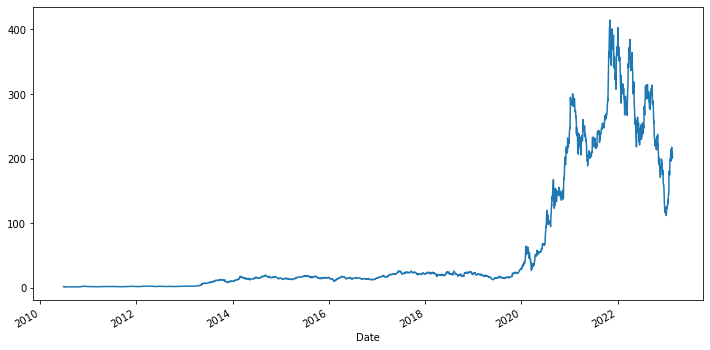

In [89]:
df_tesla['High'].plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

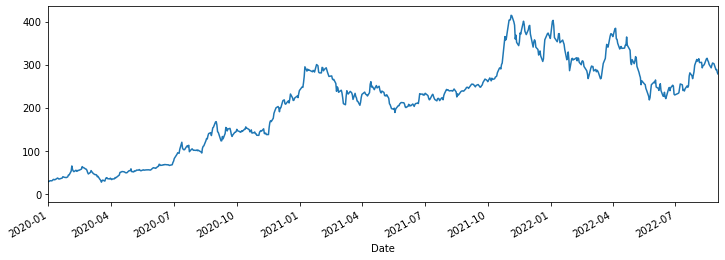

In [90]:
## xlimit and y limit
df_tesla['High'].plot(xlim=['2020-01-01','2022-09-01'],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

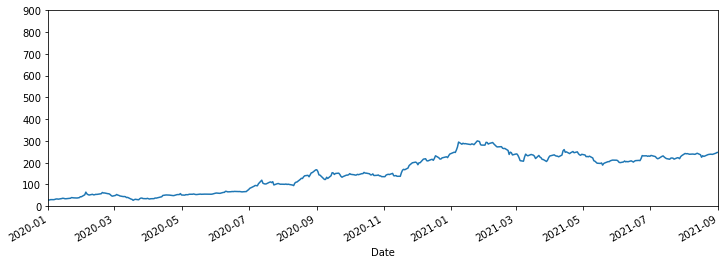

In [91]:
## xlimit and y limit
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4))

<AxesSubplot:xlabel='Date'>

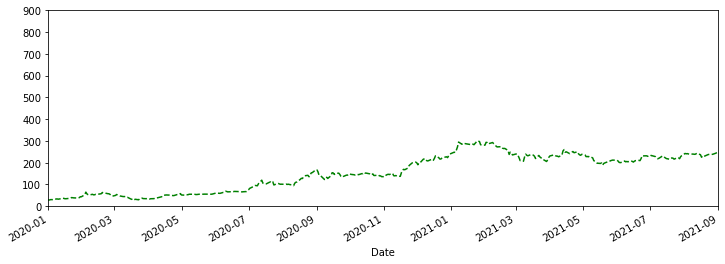

In [92]:
## xlimit and y limit and coloring
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=[0,900],figsize=(12,4),ls='--',c='green')

In [93]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-13',
               '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17',
               '2023-02-21', '2023-02-22'],
              dtype='datetime64[ns]', name='Date', length=3185, freq=None)

In [97]:

index=df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open=df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [98]:
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

In [15]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

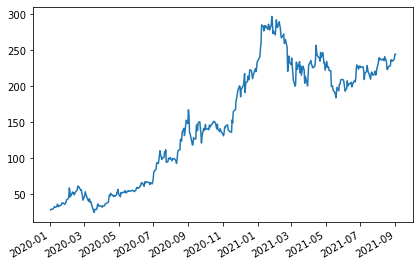

In [100]:
figure,axis=plt.subplots()
plt.tight_layout()
## Preventing overlapping
figure.autofmt_xdate()
axis.plot(index,share_open)

In [ ]:
## Datetime Index

In [18]:
df_tesla=df_tesla.reset_index()

In [19]:

df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3184 entries, 0 to 3183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3184 non-null   datetime64[ns]
 1   Open       3184 non-null   float64       
 2   High       3184 non-null   float64       
 3   Low        3184 non-null   float64       
 4   Close      3184 non-null   float64       
 5   Adj Close  3184 non-null   float64       
 6   Volume     3184 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 174.2 KB


In [20]:
df_tesla=df_tesla.set_index('Date',drop=True)

In [21]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [101]:
## datetime
from datetime import datetime

In [102]:

datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [104]:
datetime.now()

datetime.datetime(2023, 2, 22, 22, 5, 3, 430977)

In [105]:
date=datetime(2021,11,21)
date

datetime.datetime(2021, 11, 21, 0, 0)

In [108]:
date.date()

datetime.date(2021, 11, 21)

In [107]:
date.day

21

In [28]:
date.weekday()

6

In [109]:
date.year

2021

In [110]:
date.month

11

In [ ]:
Time Resampling # Resample time-series data

In [111]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [116]:
df_tesla.resample(rule='A').mean()  # anual

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.560533,1.605149,1.509738,1.556123,1.556123,2.369643e+07
2011-12-31,1.788132,1.825349,1.746278,1.786984,1.786984,1.935923e+07
2012-12-31,2.080208,2.120611,2.036392,2.077907,2.077907,1.844694e+07
2013-12-31,6.961095,7.123534,6.785325,6.960082,6.960082,1.261158e+08
2014-12-31,14.894360,15.163325,14.613741,14.888606,14.888606,1.037096e+08
2015-12-31,15.322130,15.558778,15.084709,15.336193,15.336193,6.477487e+07
2016-12-31,14.003897,14.228899,13.752410,13.984484,13.984484,6.918820e+07
2017-12-31,20.953081,21.230040,20.645798,20.954420,20.954420,9.502180e+07
2018-12-31,21.145564,21.579575,20.703487,21.153995,21.153995,1.291816e+08


In [33]:
df_tesla.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


<AxesSubplot:xlabel='Date'>

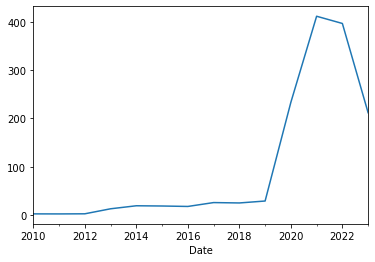

In [34]:
##year end frequency
df_tesla.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

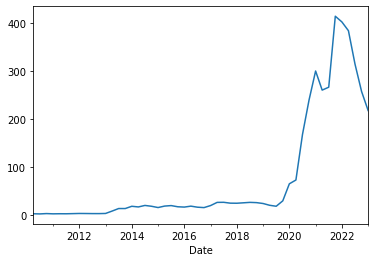

In [35]:
##quaterly start frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='QS').max()['High'].plot()

In [36]:
##Business End Frequency
##https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
df_tesla.resample(rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


In [37]:
df_tesla.resample(rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,1.719333,2.028000,1.553333,1.592667,1.592667,281494500
2010-07-01,1.666667,1.728000,1.408667,1.465333,1.465333,123282000
2010-10-01,2.391333,2.428000,2.316667,2.364667,2.364667,139528500
2011-01-03,1.906000,1.914000,1.870000,1.896667,1.896667,172767000
2011-04-01,2.006667,2.100000,1.970000,2.009333,2.009333,93138000
2011-07-01,1.992667,2.029333,1.934000,1.982000,1.982000,45967500
2011-10-03,2.308667,2.333333,2.268667,2.329333,2.329333,58024500
2012-01-02,2.546000,2.663333,2.474000,2.529333,2.529333,82506000
2012-04-02,2.488667,2.564667,2.444667,2.534000,2.534000,83344500


<AxesSubplot:xlabel='Date'>

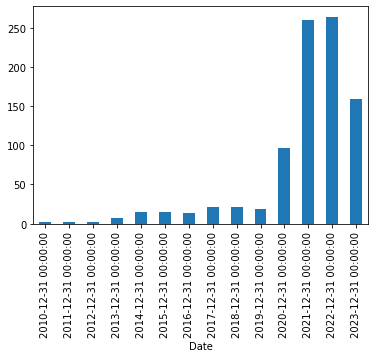

In [38]:
##plotting
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

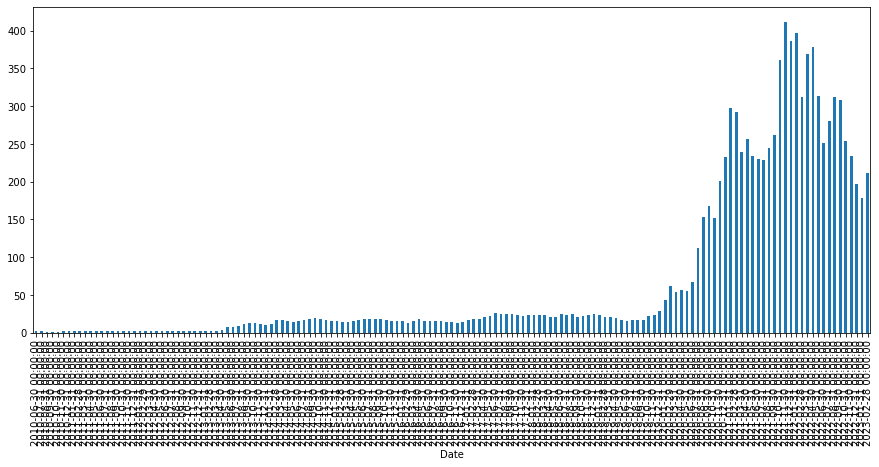

In [47]:
## Preventing overlapping
figure.autofmt_xdate()
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(15,6))

In [48]:

df_tesla['High'].rolling(11).max().head(20)

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13         NaN
2010-07-14    2.028000
2010-07-15    2.028000
2010-07-16    1.728000
2010-07-19    1.540000
2010-07-20    1.483333
2010-07-21    1.483333
2010-07-22    1.483333
2010-07-23    1.483333
2010-07-26    1.483333
2010-07-27    1.483333
Name: High, dtype: float64

In [49]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [50]:
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(30).mean()

In [51]:
df_tesla.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open:30 days rolling
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,NaN
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,NaN
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,NaN
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,NaN


<AxesSubplot:xlabel='Date'>

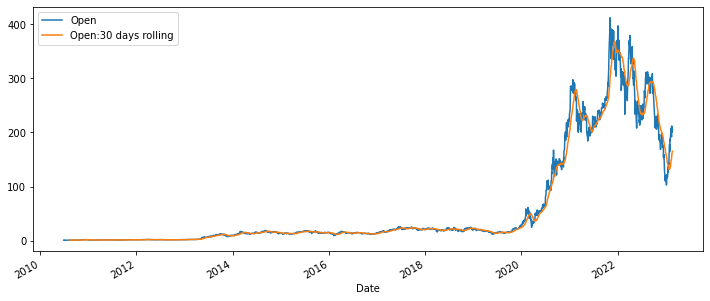

In [52]:
df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))

In [68]:
airline_passengers=pd.read_csv("airline_passengers.csv")
df_airline=airline_passengers.iloc[:-1,1:]
df_airline

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
137,1960-06,535.0
138,1960-07,622.0
139,1960-08,606.0
140,1960-09,508.0


In [69]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [70]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    142 non-null    object 
 1   Thousands of Passengers  142 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB


In [71]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [72]:

df_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    142 non-null    datetime64[ns]
 1   Thousands of Passengers  142 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.3 KB


In [73]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [74]:
df_airline.set_index('Month',inplace=True)

In [75]:

df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

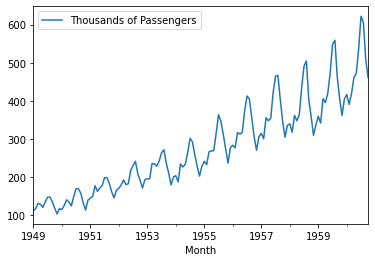

In [76]:

df_airline.plot()

In [77]:
from statsmodels.tsa.stattools import adfuller

In [78]:
adfuller(df_airline['Thousands of Passengers'])

(1.1139714670551724,
 0.9953341170296188,
 13,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 979.6061006955711)

In [79]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [80]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 1.1139714670551724
p- value: 0.9953341170296188
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [81]:
## Use Techniques Differencing
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [82]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [83]:
adf_test(df_airline['Passengers First Difference'].dropna())


ADF Statistics: -2.6021225074114938
p- value: 0.09255938134779179
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [84]:
## Use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [85]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.009749782915257
p- value: 6.3751968733846e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
pdr.get_data_yahoo('TSLA')
pdr.get_data_yahoo('TSLA', start='2010-01-01', end='2022-02-22')
 #Adjusted Close Stock Price data for Bank of America, source is Yahoo finance
# Only get the adjusted close.
bac = pdr.DataReader("BAC", 
                      start='1990-1-1', 
                      end='2019-10-15', 
                      data_source='yahoo')['Adj Close']